# Brainstorm Proyecto 1 - DP

Se plantean dos posibles enfoques. 

1. Uno donde se parametrizan en una recurrencia el movimiento de Indiana, Marion y Salah (Dicha recurrencia será denomoniada $P$)
2. Un conjunto de tres recurrencias que modelan el comportamiento de cada personaje y que son invocadas de acuerdo a distintas prioridades de recorrido para cada una de las personas.

Antes de eso, se definen las siguientes entradas y salidas

| E/S | Nombre | Tipo | Descripción |
|-|-|-|-|
|E| A | Array[0,R)[0,C) of **int** | Matriz con la representación de la cantidad de reliquias y maldiciones de la pirámide|
|S| s | **int** | Cantidad máxima de reliquias que pueden obtener los tres personajes |

## Enfoque de única recurrencia

Tanto Marion, como Indiana y Salah pueden moverse en un espacio de $C \times \left\lfloor \dfrac{R}{2} \right\rfloor$. Por consiguiente, una estructura que pueda almacenar la cantidad maxima de reliquias obtenidas para cada combinacion de posiciones deberá tener una forma de $C \times C \times C \times \left\lfloor \dfrac{R}{2} \right\rfloor$

Para este enfoque tendremos en cuenta los siguientes puntos:

1. Todas las casillas invalidas deberán tener un valor de $-\infty$ para aquellas configuraciones invalidas (Ejemplo: Aquellas casillas con maldiciones y aquellas que en la primera y ultima fila que no correspondan al punto de partida de los personajes) 
2. La casilla inicial de cada personaje debe iniciar con cero reliquias.
3. Los demás casos recursivos representan todas las cobinaciones posibles de los movimientos de los personajes

$$ P(i,m,s,r) = \left\{
    \begin{array}{}
        0 & & \text{si} & & r = 0 \wedge i=0 \wedge m=C-1 \wedge s = \left\lfloor \frac{C}{2} \right\rfloor \\
        -\infty & & \text{si} & & A[r][i]=-1 \vee A[r][m]=-1 \vee A[r][s]=-1 \vee \left(r=0 \wedge i>0  \wedge m < C-1 \wedge s \neq \left\lfloor \frac{C}{2} \right\rfloor \right)\\
        ... 
    \end{array}
    \right.
$$

**¿Que problema tiene?** Los indices i,m,s van los tres desde $0$ hasta $C-1$ y el indice r va desde $0$ hasta $\left\lfloor \dfrac{R}{2} \right\rfloor$. Esto significa que la complejidad tanto temporal como espacial de este algoritmo será de orden $O(C^3 R)$. Lo cual se convierte en un problema muy costoso computacionalmente hablando

## Enfoque de muchas recurrencias

Para este enfoque, diseñaremos una recurrencia para cada personaje. $I$ estara asociada a Indiana, $M$ estara asociada a Marion y $S$ estara asociada a Salah

$$ I(r,i) = \left\{
    \begin{array}{}
        0 & & \text{si} & & r=0 \wedge i = 0 \\
        -\infty & & \text{si} & &  A[r][i] = -1 \vee (r=0 \wedge i > 0) \\
        \max (I(r-1,i),I(r-1,i+1)) + A[r][i] & & \text{si} & & r>0 \wedge i = 0 \\
        \max (I(r-1,i),I(r-1,i-1)) + A[r][i] & & \text{si} & & r>0 \wedge i = C-1 \\
        \max (I(r-1,i),I(r-1,i-1),I(r-1,i+1)) + A[r][i] & & \text{si} & & r>0 \wedge 0 < i < C-1 \\
    \end{array}
    \right.
$$

$$ M(r,i) = \left\{
    \begin{array}{}
        0 & & \text{si} & & r=0 \wedge i = C-1 \\
        -\infty & & \text{si} & &  A[r][i] = -1 \vee (r=0 \wedge i < C-1) \\
        \max (M(r-1,i),M(r-1,i+1)) + A[r][i] & & \text{si} & & r>0 \wedge i = 0 \\
        \max (M(r-1,i),I(r-1,i-1)) + A[r][i] & & \text{si} & & r>0 \wedge i = C-1 \\
        \max (M(r-1,i),I(r-1,i-1),M(r-1,i+1)) + A[r][i] & & \text{si} & & r>0 \wedge 0 < i < C-1 \\
    \end{array}
    \right.
$$

$$ S(r,i) = \left\{
    \begin{array}{}
        0 & & \text{si} & & r= R-1 \wedge i = \lfloor \frac{C}{2} \rfloor\\
        -\infty & & \text{si} & &  A[r][i] = -1 \vee (r = R-1 \wedge i \neq \lfloor \frac{C}{2} \rfloor) \\
        \max(S(r+1,i),S(r+1,i+1)) & & \text{si} & & r < R-1 \wedge i = 0 \\
        \max(S(r+1,i),S(r+1,i-1)) & & \text{si} & & r < R-1 \wedge i = C-1 \\
        \max(S(r+1,i),S(r+1,i-1),S(r+1,i+1)) & & \text{si} & & r < R-1 \wedge 0 < i < C-1 \\
    \end{array}
    \right.
$$

In [29]:
import numpy as np

def IndianaPath(A):
    R,C = A.shape
    I = np.zeros(shape=(R,C),dtype=int)
    inf = int(1e5)
    for r in range(0,R):
        for i in range(0,C):
            if r==0 and i==0: I[r,i] = 0 # I[r][i]
            elif A[r][i]==-1 or (r==0 and i>0): I[r,i] = - inf # Integer.MIN_VALUE
            elif r>0 and i==0: I[r,i] = max(I[r-1,i],I[r-1,i+1]) + A[r][i]
            elif r>0 and i==C-1: I[r,i] = max(I[r-1,i],I[r-1,i-1]) + A[r][i]
            elif r>0 and 0<i<C-1: I[r,i] = max(I[r-1,i],I[r-1,i-1],I[r-1,i+1]) + A[r][i]  #max(a,b,c) = max(a,max(b,c))
    row = int(np.floor(R/2)) # int row = R/2;
    max_ , c = I[row,0], 0
    for column in range(1,C-1):
        if I[row,column] > max_:
            max_ = I[row,column]
            c = column
    print(f'Columna: {c}')
    return max_

In [30]:
A = np.array(
    [
        [0,-1,-1,-1,0],
        [2,3,-1,5,4],
        [-1,5,15,2,7],
        [-1,1,-1,2,-1],
        [-1,-1,0,-1,-1]
    ]
)
IndianaPath(A)


Columna: 2


18

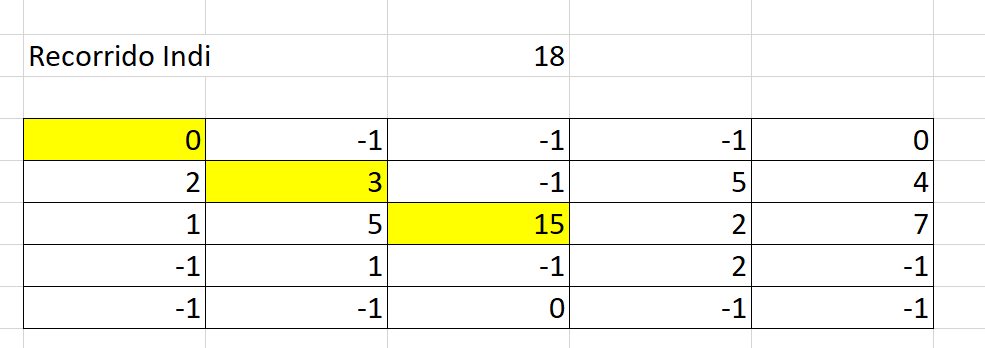